In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
kmeans=pd.read_csv('crime_data.csv')

In [3]:
kmeans.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
kmeans1=kmeans.drop({'Unnamed: 0'},axis=1) 
kmeans1

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [5]:
# Normalize heterogenous numerical data by using Standard Scaler
kmeans_norm=StandardScaler().fit_transform(kmeans1)
kmeans_norm

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

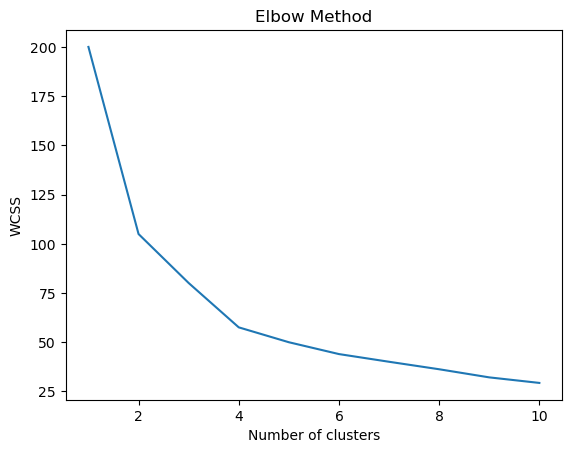

In [6]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(kmeans_norm)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
#Build Cluster algorithm

KM_clusters = KMeans(4, random_state=42)
KM_clusters.fit(kmeans_norm)

KMeans(n_clusters=4, random_state=42)

In [8]:
KM_clusters.labels_

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0])

In [9]:
#Assign clusters to the data set
kmeans1['clusterid_Kmeans'] = KM_clusters.labels_
kmeans1

,Murder,Assault,UrbanPop,Rape,clusterid_Kmeans
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,2
5,7.9,204,78,38.7,2
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,2
9,17.4,211,60,25.8,1


In [10]:
kmeans1.groupby('clusterid_Kmeans').agg(['mean']).reset_index()

,clusterid_Kmeans,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.656250,138.875000,73.875000,18.781250
1,1,13.937500,243.625000,53.750000,21.412500
2,2,10.815385,257.384615,76.000000,33.192308
3,3,3.600000,78.538462,52.076923,12.176923


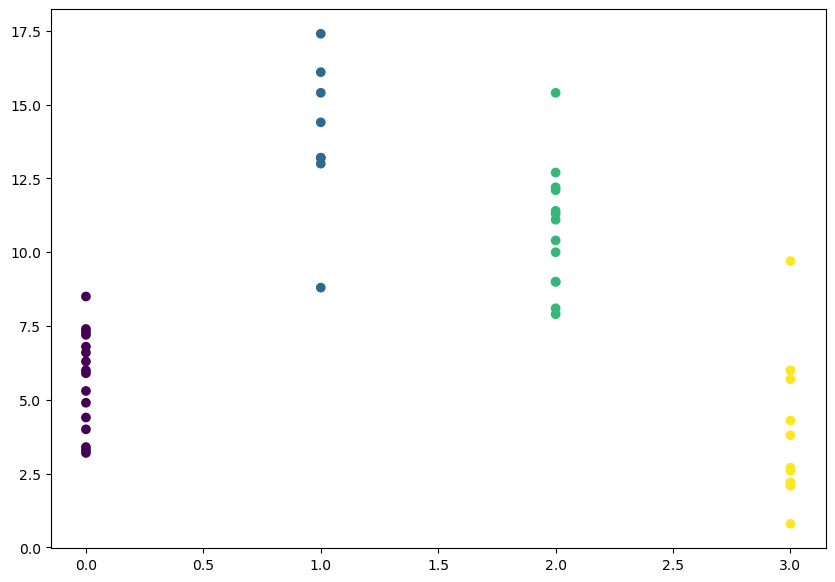

In [11]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(kmeans1['clusterid_Kmeans'],kmeans1['Murder'], c=KM_clusters.labels_) 

In [12]:
# States in cluster #0 
kmeans1[kmeans1['clusterid_Kmeans']==0]

,Murder,Assault,UrbanPop,Rape,clusterid_Kmeans
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
10,5.3,46,83,20.2,0
13,7.2,113,65,21.0,0
15,6.0,115,66,18.0,0
20,4.4,149,85,16.3,0
29,7.4,159,89,18.8,0
34,7.3,120,75,21.4,0
35,6.6,151,68,20.0,0
36,4.9,159,67,29.3,0


In [13]:
# States in cluster #1 
kmeans1[kmeans1['clusterid_Kmeans']==1]

,Murder,Assault,UrbanPop,Rape,clusterid_Kmeans
0,13.2,236,58,21.2,1
3,8.8,190,50,19.5,1
9,17.4,211,60,25.8,1
17,15.4,249,66,22.2,1
23,16.1,259,44,17.1,1
32,13.0,337,45,16.1,1
39,14.4,279,48,22.5,1
41,13.2,188,59,26.9,1


In [14]:
# States in cluster #2
kmeans1[kmeans1['clusterid_Kmeans']==2] 

,Murder,Assault,UrbanPop,Rape,clusterid_Kmeans
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
4,9.0,276,91,40.6,2
5,7.9,204,78,38.7,2
8,15.4,335,80,31.9,2
12,10.4,249,83,24.0,2
19,11.3,300,67,27.8,2
21,12.1,255,74,35.1,2
24,9.0,178,70,28.2,2
27,12.2,252,81,46.0,2
